# TRABALHO DE IAA007 – Visualização de Dados e Storytelling

Aluno: Rodrigo de Araujo

## 1 - Análise exploratória de dados e preparação dos dados

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

In [44]:
df = pd.read_csv('homicidios_uf.csv', delimiter=';')

regioes_brasil = {
    'AC': 'Norte', 'AM': 'Norte', 'AP': 'Norte', 'PA': 'Norte',
    'RO': 'Norte', 'RR': 'Norte', 'TO': 'Norte',
    'AL': 'Nordeste', 'BA': 'Nordeste', 'CE': 'Nordeste',
    'MA': 'Nordeste', 'PB': 'Nordeste', 'PE': 'Nordeste',
    'PI': 'Nordeste', 'RN': 'Nordeste', 'SE': 'Nordeste',
    'ES': 'Sudeste', 'MG': 'Sudeste', 'RJ': 'Sudeste', 'SP': 'Sudeste',
    'PR': 'Sul', 'RS': 'Sul', 'SC': 'Sul',
    'DF': 'Centro-Oeste', 'GO': 'Centro-Oeste', 'MS': 'Centro-Oeste',
    'MT': 'Centro-Oeste'
}

# Dados originais enriquecidos com o agrupamento de estados por região.
df['regiao'] = df['nome'].map(regioes_brasil)

df.to_csv('homicidios_uf_enriquecido.csv', index=False)

In [45]:
df.head()

,cod,nome,período,valor,regiao
0,25,PB,1989,461,Nordeste
1,16,AP,1989,39,Norte
2,15,PA,1989,666,Norte
3,21,MA,1989,411,Nordeste
4,41,PR,1989,1112,Sul


In [46]:
df.describe()

,cod,período,valor
count,945.000000,945.000000,945.000000
mean,29.111111,2006.000000,1733.992593
std,12.787927,10.104853,2190.121162
min,11.000000,1989.000000,39.000000
25%,17.000000,1997.000000,442.000000
50%,27.000000,2006.000000,881.000000
75%,41.000000,2015.000000,2085.000000
max,53.000000,2023.000000,15773.000000


In [47]:
# busca por dados faltantes
df.isnull().sum()

cod        0
nome       0
período    0
valor      0
regiao     0
dtype: int64

In [48]:
# busca por dados duplicados
df.duplicated().sum()

0

In [49]:
# busca por dados nulos
df.isna().sum()

cod        0
nome       0
período    0
valor      0
regiao     0
dtype: int64

### Conclusão da EDA

## Contexto dos dados
Os dados do arquivo homicidios_uf.csv contêm informações sobre o número de homicídios por estado no Brasil ao longo dos anos, de 1989 a 2023. As colunas são:

- cod: Código número identificador do estado.
- nome: Nome do estado.
- período: Ano em que o homicídio ocorreu.
- valor: Número de homicídios.
- regiao: Região do estado.

O dataset está limpo, sem valores nulos, e os tipos de dados são apropriados para a análise temporal e numérica.
Os dados foram coletados site do https://www.ipea.gov.br/atlasviolencia/filtros-series, pesquisa por Homicídios, então escolha da série: 'Homicídios' dados agrupados por UF.

## Limitações
- O dataset não possui a informação de região, logo foi enriquecido com essa informação.
- Não possui os anos de 2024 e 2025.


### 2 - Testes, escolha e justificativa das visualizações

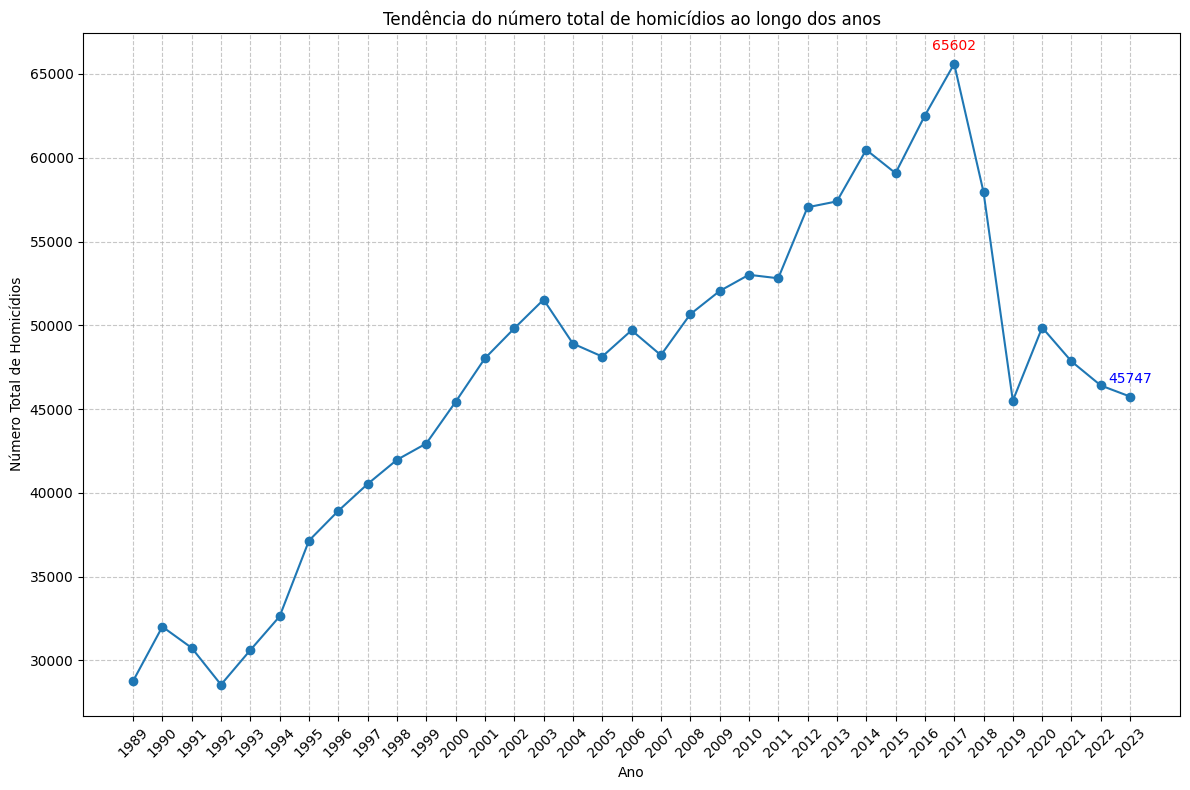

In [52]:
# Gráfico: Análise temporal da evolução do número de homicídios
# Justificativa: Utilizado o gráfico de linhas para mostrar a evolução ao longo dos anos.

homicides_trend = df.groupby('período')['valor'].sum()

plt.figure(figsize=(12, 8))
homicides_trend.plot(kind='line', marker='o')

plt.title('Tendência do número total de homicídios ao longo dos anos')
plt.xlabel('Ano')
plt.ylabel('Número Total de Homicídios')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(homicides_trend.index, rotation=45)

year_2017 = homicides_trend.loc[2017]
year_2023 = homicides_trend.loc[2023]

plt.annotate(f'{year_2017}', (2017, year_2017),
             textcoords="offset points", xytext=(0,10), ha='center', color='red')
plt.annotate(f'{year_2023}', (2023, year_2023),
             textcoords="offset points", xytext=(0,10), ha='center', color='blue')
plt.tight_layout()

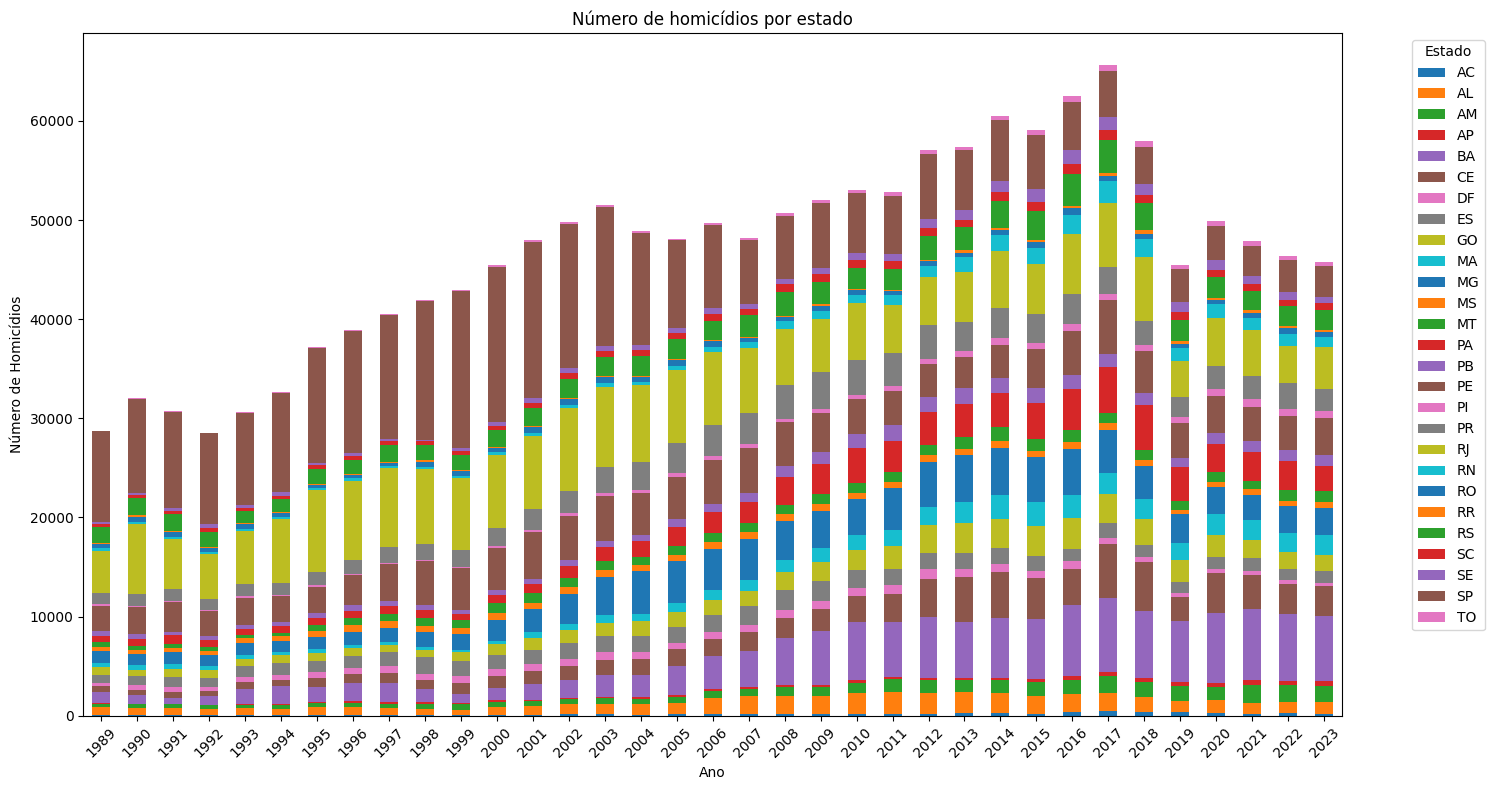

In [54]:
# Gráfico: Comparativo do número de homicídios por estado
# Justificativa: Utilizado o gráfico de barras empilhadas para mostrar comparação da evolução, porém o gráfico não foi utilizado pois ficou muito poluido e não facilitou a comparação.

df_pivot_state = df.pivot_table(index='período', columns='nome', values='valor', aggfunc='sum')

plt.figure(figsize=(15, 8))
df_pivot_state.plot(kind='bar', stacked=True, ax=plt.gca())

plt.title('Número de homicídios por estado')
plt.xlabel('Ano')
plt.ylabel('Número de Homicídios')
plt.xticks(rotation=45)
plt.legend(title='Estado', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

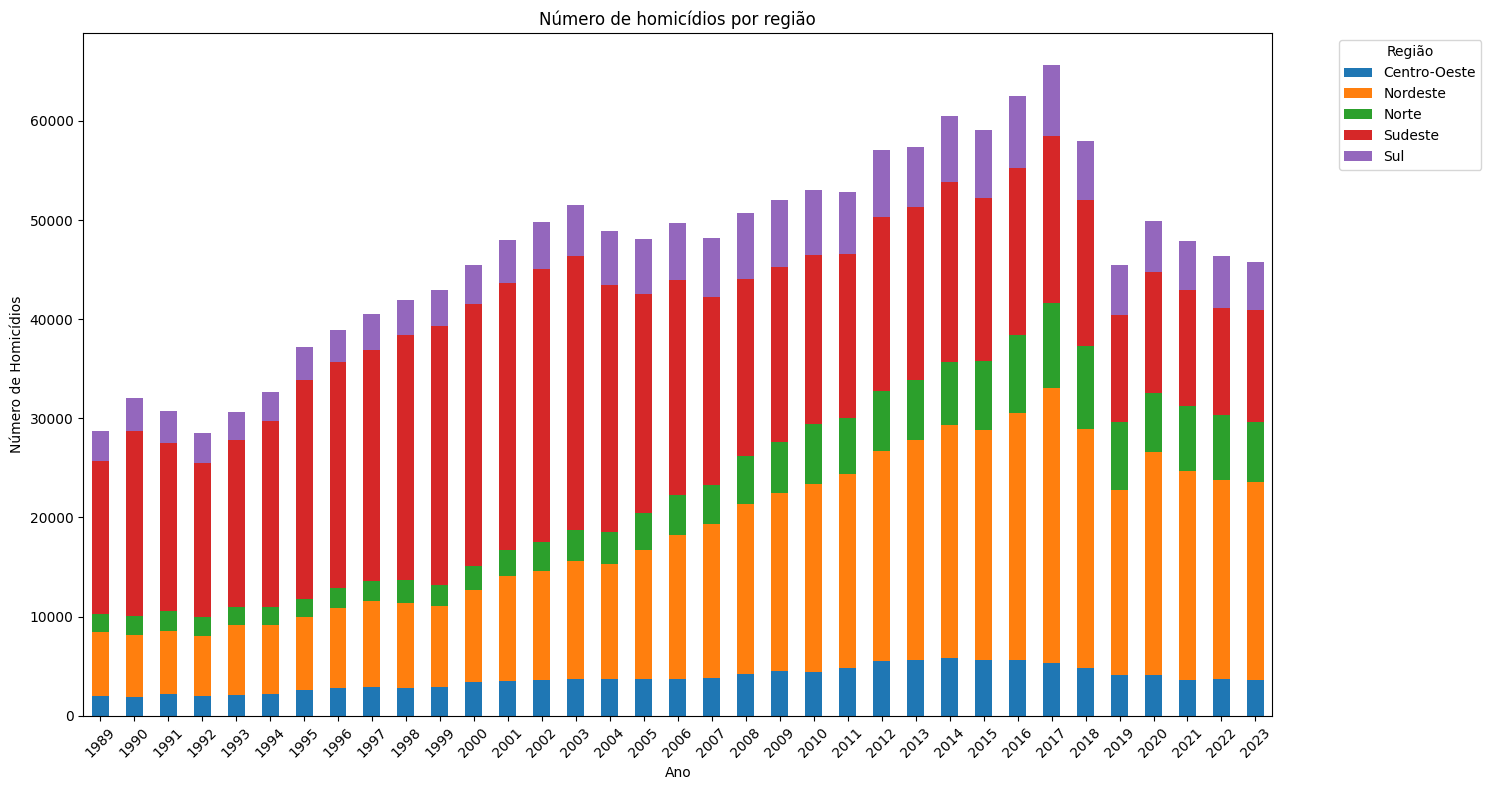

In [56]:
# Gráfico: Comparativo do número de homicídios por região
# Justificativa: Utilizado o gráfico de barras empilhadas para mostrar comparação da evolução, por região fica mais fácil a análise e utilização em uma possível narrativa de storytelling.

df_pivot_region = df.pivot_table(index='período', columns='regiao', values='valor', aggfunc='sum')

plt.figure(figsize=(15, 8))
df_pivot_region.plot(kind='bar', stacked=True, ax=plt.gca())

plt.title('Número de homicídios por região')
plt.xlabel('Ano')
plt.ylabel('Número de Homicídios')
plt.xticks(rotation=45)
plt.legend(title='Região', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

Os 5 estados com mais homicídios:
nome
SP    296124
RJ    214246
BA    133903
PE    130524
MG    102238
Name: valor, dtype: int64


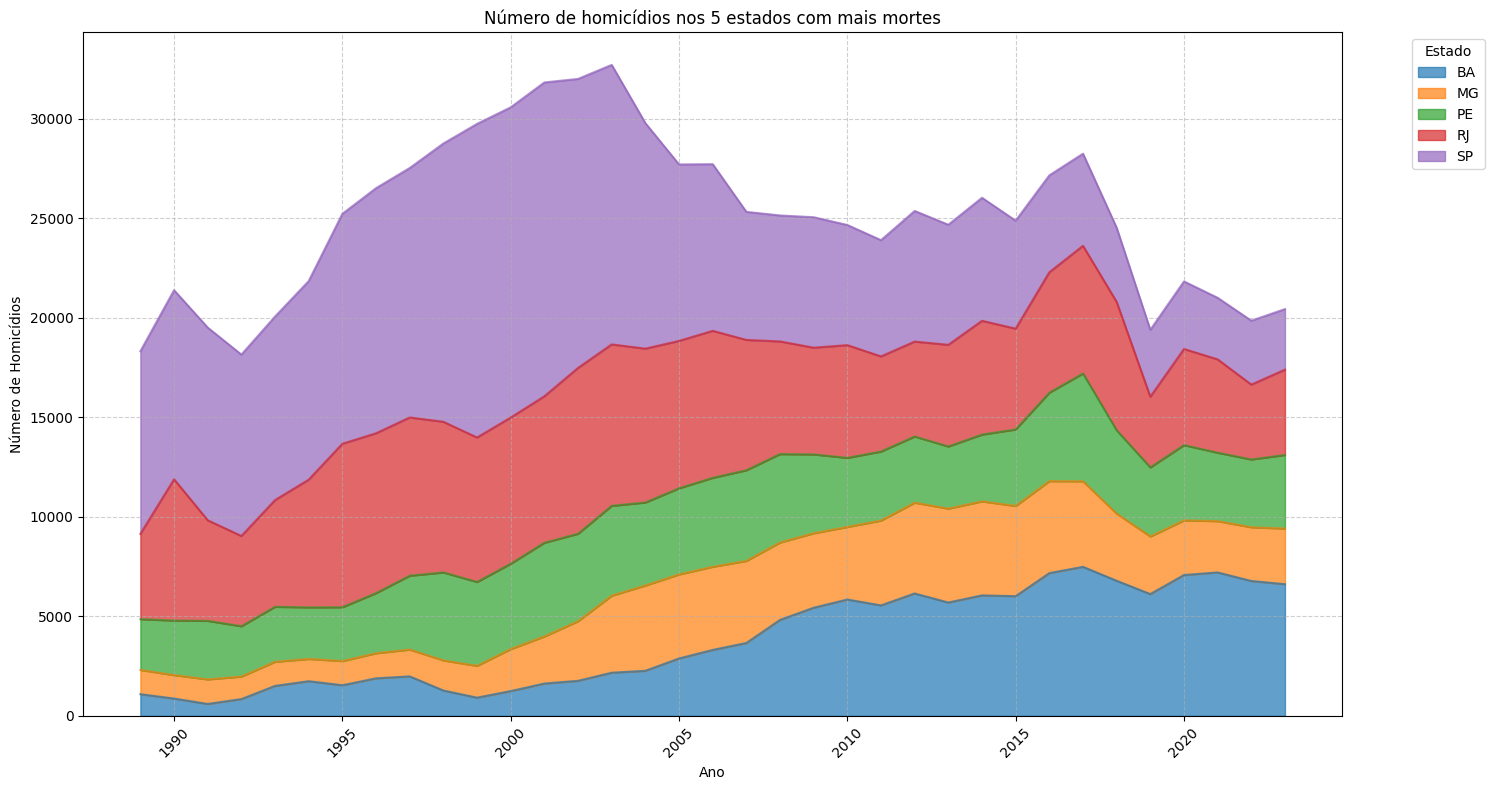

In [57]:
# Gráfico: Mostrar a evolução dos homicídios nos 5 estados com mais mortes ao longo do tempo.
# Justificativa: Como o gráfico de área também para melhor visualizar as mudanças ao longo do tempo, foi utilizado o gráfico de área para uma melhor visualização e evitar o emaranhado de linhas.
homicides_by_state = df.groupby('nome')['valor'].sum()

top_5_states = homicides_by_state.sort_values(ascending=False).head(5)

print("Os 5 estados com mais homicídios:")
print(top_5_states)

top_5_states_names = ['SP', 'RJ', 'BA', 'PE', 'MG']

df_top5 = df[df['nome'].isin(top_5_states_names)]

df_area = df_top5.pivot_table(index='período', columns='nome', values='valor', fill_value=0)

plt.figure(figsize=(15, 8))
df_area.plot(kind='area', stacked=True, ax=plt.gca(), alpha=0.7)

plt.title('Número de homicídios nos 5 estados com mais mortes')
plt.xlabel('Ano')
plt.ylabel('Número de Homicídios')
plt.xticks(rotation=45)
plt.legend(title='Estado', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

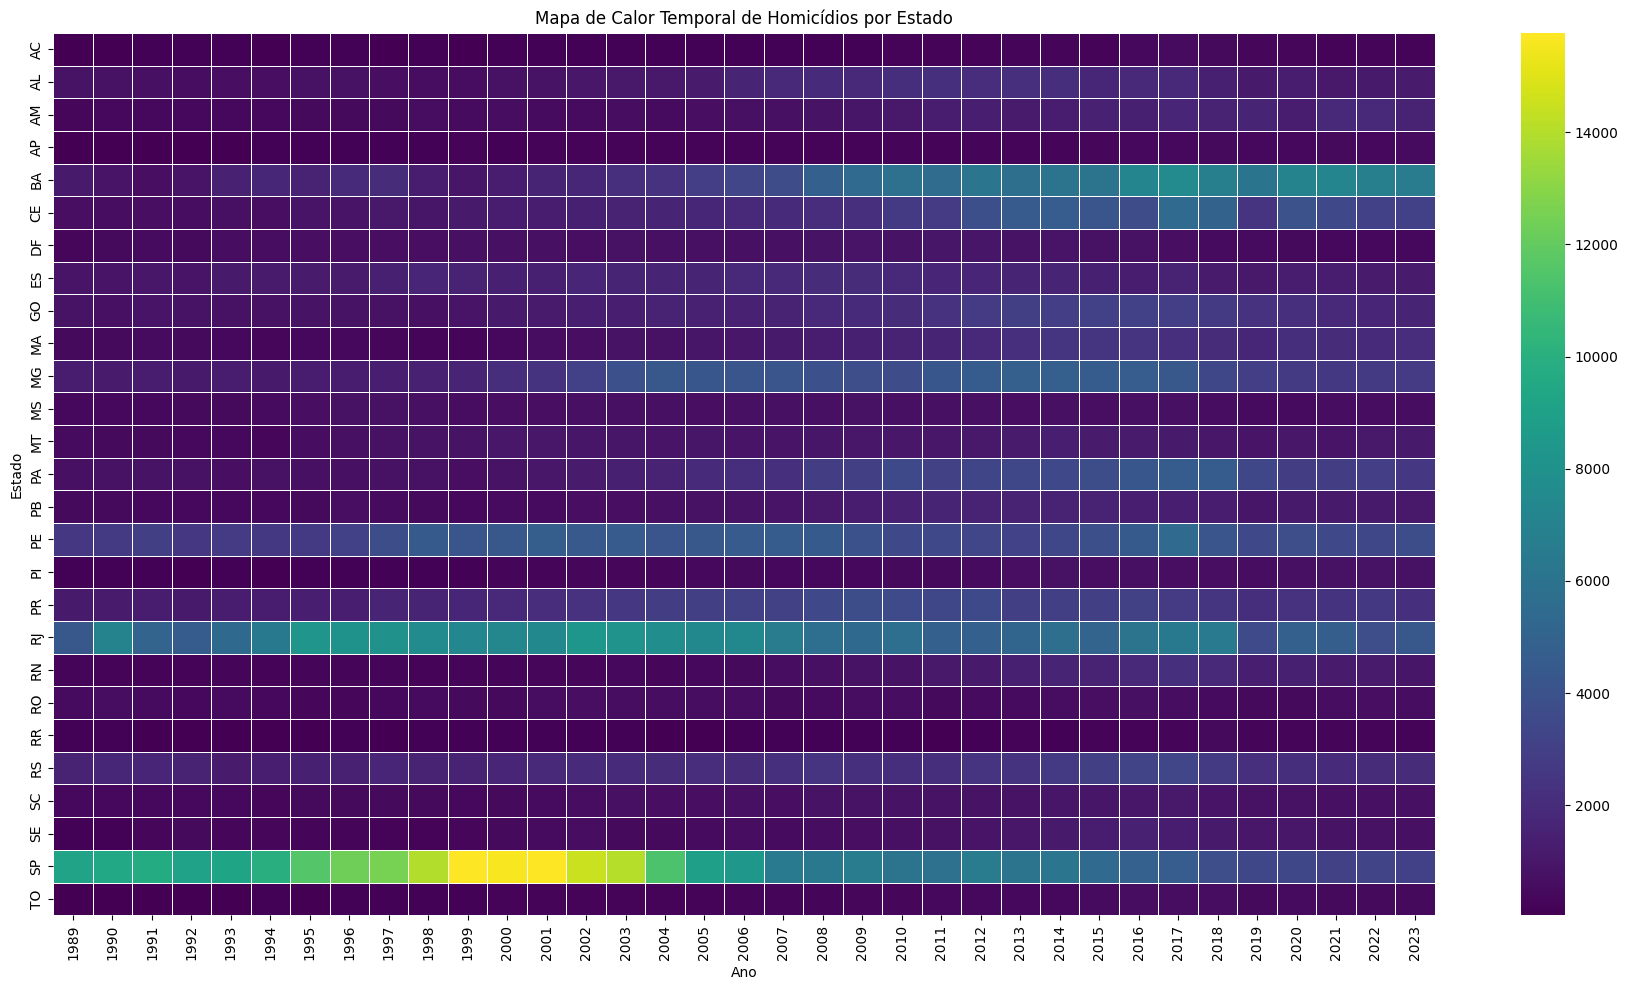

In [77]:
# Gráfico: Mostrar a contribuição de cada estado ao longo do tempo
# Justificativa: Tentativa do mapa de calor, porém o gráfico ficou muito complexo requerendo muito análise pelo leitor, logo será descartado.
heatmap_data = df.pivot_table(index='nome', columns='período', values='valor', fill_value=0)

plt.figure(figsize=(18, 10)) 
sns.heatmap(heatmap_data, cmap='viridis', annot=False, fmt=".0f", linewidths=.5)
plt.title('Mapa de Calor Temporal de Homicídios por Estado')
plt.xlabel('Ano')
plt.ylabel('Estado')
plt.tight_layout()

O número total de homicídios em 2017 foi: 65602
O número total de homicídios em 2023 foi: 45747
Homicídios por Estado em 2017:
nome
BA    7487
RJ    6416
CE    5433
PE    5419
SP    4631
PA    4575
MG    4299
RS    3316
GO    2901
PR    2759
RN    2203
MA    2180
AL    1813
AM    1674
ES    1521
PB    1341
SE    1313
MT    1102
SC    1066
MS     659
PI     626
DF     610
TO     557
RO     554
AC     516
AP     383
RR     248
Name: valor, dtype: int64


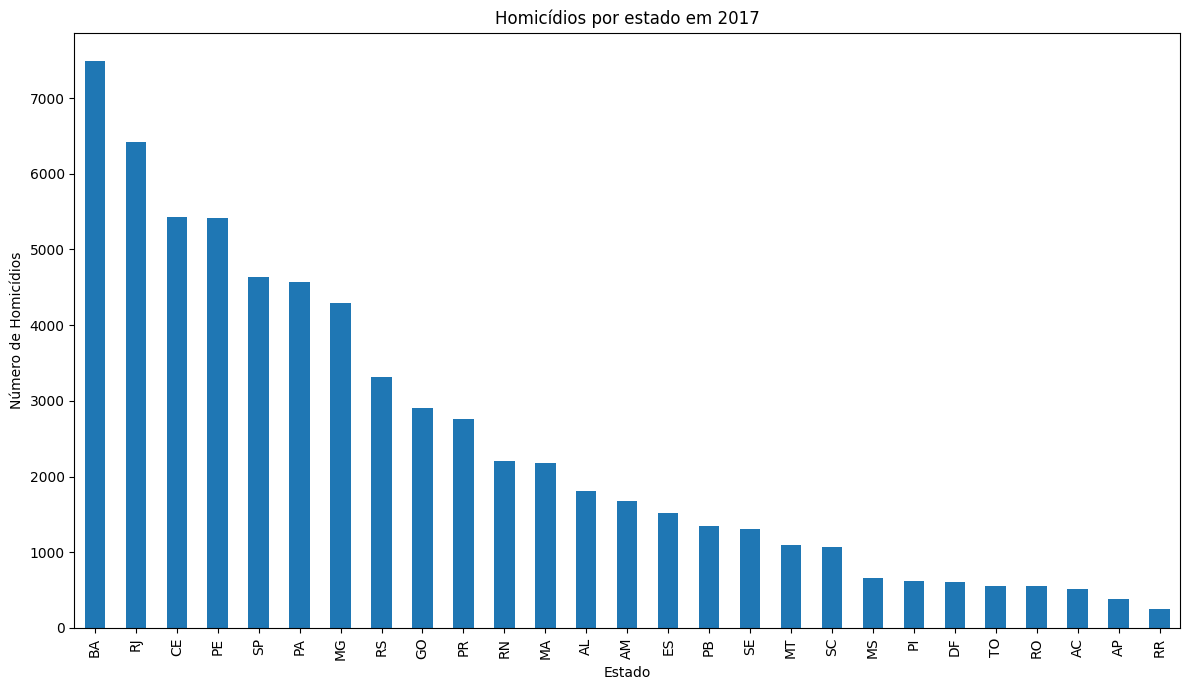

In [42]:
# Gráfico: Comparar a contribuição de cada estado com as mortes no pico de homicidios ocorridos em 2017.
# Justificativa: Uso do gráfico de barras para comparar os dados de cada estado.

df_2017 = df[df['período'] == 2017]

homicides_2017_by_state = df_2017.groupby('nome')['valor'].sum().sort_values(ascending=False)
homicides_2017_by_state.columns = ['nome', 'valor']

total_homicidios_2017 = df_2017['valor'].sum()
print(f"O número total de homicídios em 2017 foi: {total_homicidios_2017}")
print(f"O número total de homicídios em 2023 foi: {df[df['período'] == 2023]['valor'].sum()}")

print("Homicídios por Estado em 2017:")
print(homicides_2017_by_state)

plt.figure(figsize=(12, 7))
homicides_2017_by_state.plot(kind='bar')
plt.title('Homicídios por estado em 2017')
plt.xlabel('Estado')
plt.ylabel('Número de Homicídios')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('homicidios_2017_por_estado_bar_chart.png')

5 Estados onde as mortes mais cresceram nos últimos 5 anos (2019 a 2023):
nome
RJ    739
CE    575
BA    497
MA    303
PE    224
Name: valor, dtype: int64

5 Estados onde as mortes mais diminuíram nos últimos 5 anos (2019 a 2023):
nome
PA   -863
GO   -670
RN   -391
SP   -318
SE   -275
Name: valor, dtype: int64


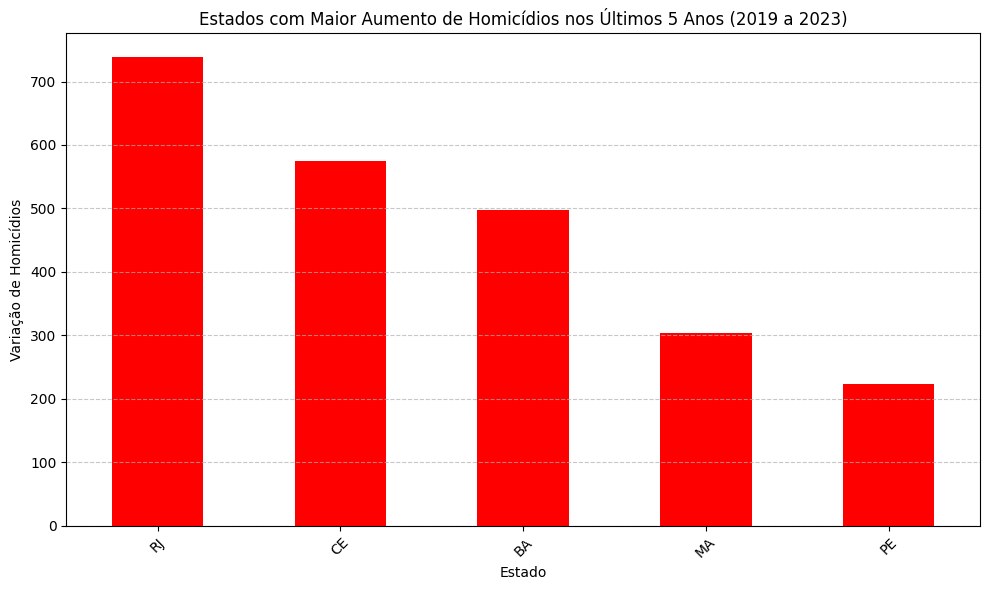

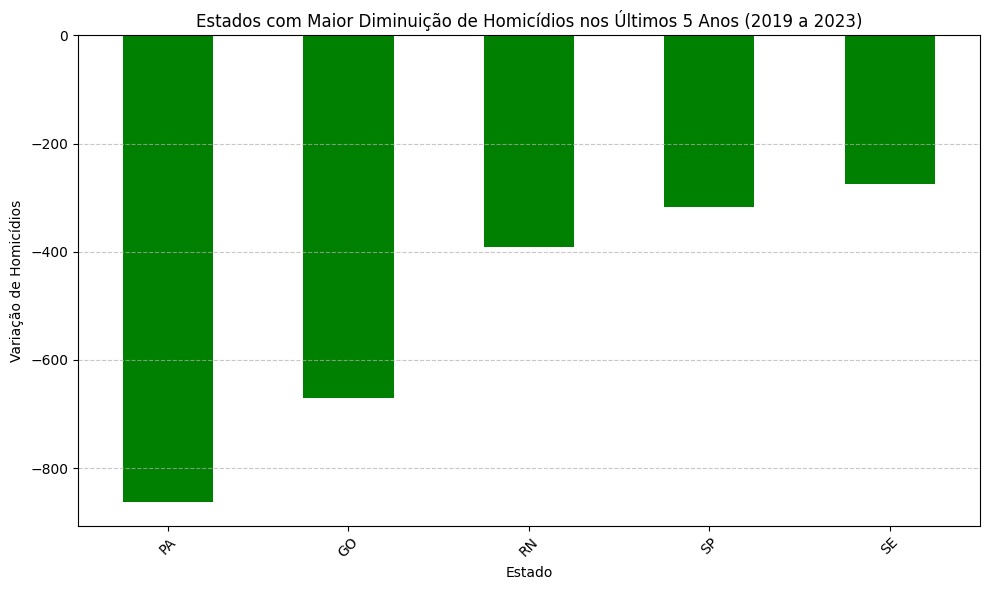

In [58]:
# Gráfico: Mostrar um comparativo dos 5 estados com maior aumento de homícidos nos últimos 5 anos e também comparar com os 5 estados com maior diminuição nas mortes.
# Justificativa: Tentativa 1 - gráficos de barras separados, porém não será utilizado pois não gera uma forma fácil de comparar os dados.

latest_year = df['período'].max()

earliest_year_for_5_years = latest_year - 4

df_last_5_years = df[df['período'] >= earliest_year_for_5_years]

homicides_earliest_5_years = df_last_5_years[df_last_5_years['período'] == earliest_year_for_5_years].set_index('nome')['valor']
homicides_latest_5_years = df_last_5_years[df_last_5_years['período'] == latest_year].set_index('nome')['valor']

homicide_change_last_5_years = homicides_latest_5_years.reindex(homicides_earliest_5_years.index, fill_value=0) - homicides_earliest_5_years.reindex(homicides_latest_5_years.index, fill_value=0)

most_increased_5_years = homicide_change_last_5_years.sort_values(ascending=False).head(5)
most_decreased_5_years = homicide_change_last_5_years.sort_values(ascending=True).head(5)

print(f"5 Estados onde as mortes mais cresceram nos últimos 5 anos ({earliest_year_for_5_years} a {latest_year}):")
print(most_increased_5_years)
print(f"\n5 Estados onde as mortes mais diminuíram nos últimos 5 anos ({earliest_year_for_5_years} a {latest_year}):")
print(most_decreased_5_years)

plt.figure(figsize=(10, 6))
most_increased_5_years.plot(kind='bar', color='red')
plt.title(f'Estados com Maior Aumento de Homicídios nos Últimos 5 Anos ({earliest_year_for_5_years} a {latest_year})')
plt.xlabel('Estado')
plt.ylabel('Variação de Homicídios')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.figure(figsize=(10, 6))
most_decreased_5_years.plot(kind='bar', color='green')
plt.title(f'Estados com Maior Diminuição de Homicídios nos Últimos 5 Anos ({earliest_year_for_5_years} a {latest_year})')
plt.xlabel('Estado')
plt.ylabel('Variação de Homicídios')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

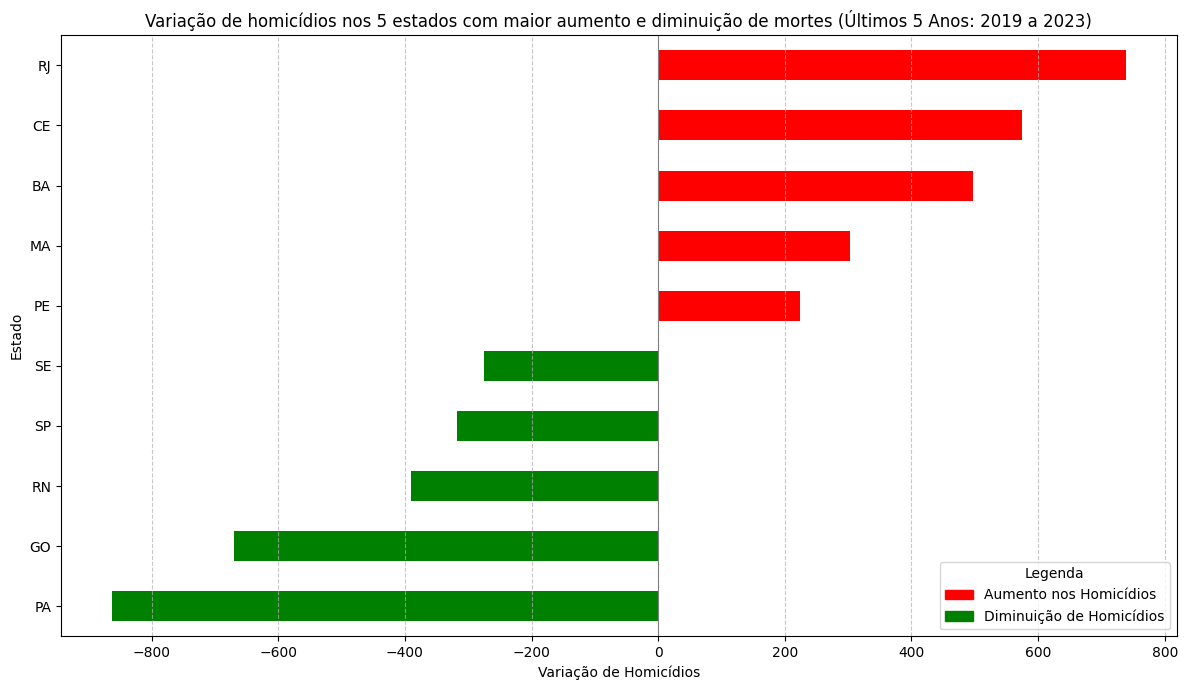

In [75]:
# Gráfico: Mostrar um comparativo dos 5 estados com maior aumento de homícidos nos últimos 5 anos e também comparar com os 5 estados com maior diminuição nas mortes.
# Justificativa: Tentativa 2 - mostrar o comparativo em um único gráfico utilizando a cor verde para os estados com diminuição de homicidios e vermelho para os que aumentaram.



latest_year = df['período'].max()

earliest_year_for_5_years = latest_year - 4

df_last_5_years = df[df['período'] >= earliest_year_for_5_years]

homicides_earliest_5y = df_last_5_years[df_last_5_years['período'] == earliest_year_for_5_years].set_index('nome')['valor']
homicides_latest_5y = df_last_5_years[df_last_5_years['período'] == latest_year].set_index('nome')['valor']

homicide_change_last_5_years = homicides_latest_5y.reindex(homicides_earliest_5y.index, fill_value=0) - homicides_earliest_5y.reindex(homicides_latest_5y.index, fill_value=0)

most_increased_5y = homicide_change_last_5_years.sort_values(ascending=False).head(5)

most_decreased_5y = homicide_change_last_5_years.sort_values(ascending=True).head(5)

combined_change = pd.concat([most_decreased_5y, most_increased_5y]).sort_values()

colors = ['green' if x < 0 else 'red' for x in combined_change]

plt.figure(figsize=(12, 7))
combined_change.plot(kind='barh', color=colors)

plt.title(f'Variação de homicídios nos 5 estados com maior aumento e diminuição de mortes (Últimos 5 Anos: {earliest_year_for_5_years} a {latest_year})')
plt.xlabel('Variação de Homicídios')
plt.ylabel('Estado') 
plt.grid(axis='x', linestyle='--', alpha=0.7) 
plt.axvline(0, color='grey', linewidth=0.8)

increase_patch = mpatches.Patch(color='red', label='Aumento nos Homicídios')
decrease_patch = mpatches.Patch(color='green', label='Diminuição de Homicídios')

plt.legend(handles=[increase_patch, decrease_patch], title='Legenda', loc='lower right')


plt.tight_layout()

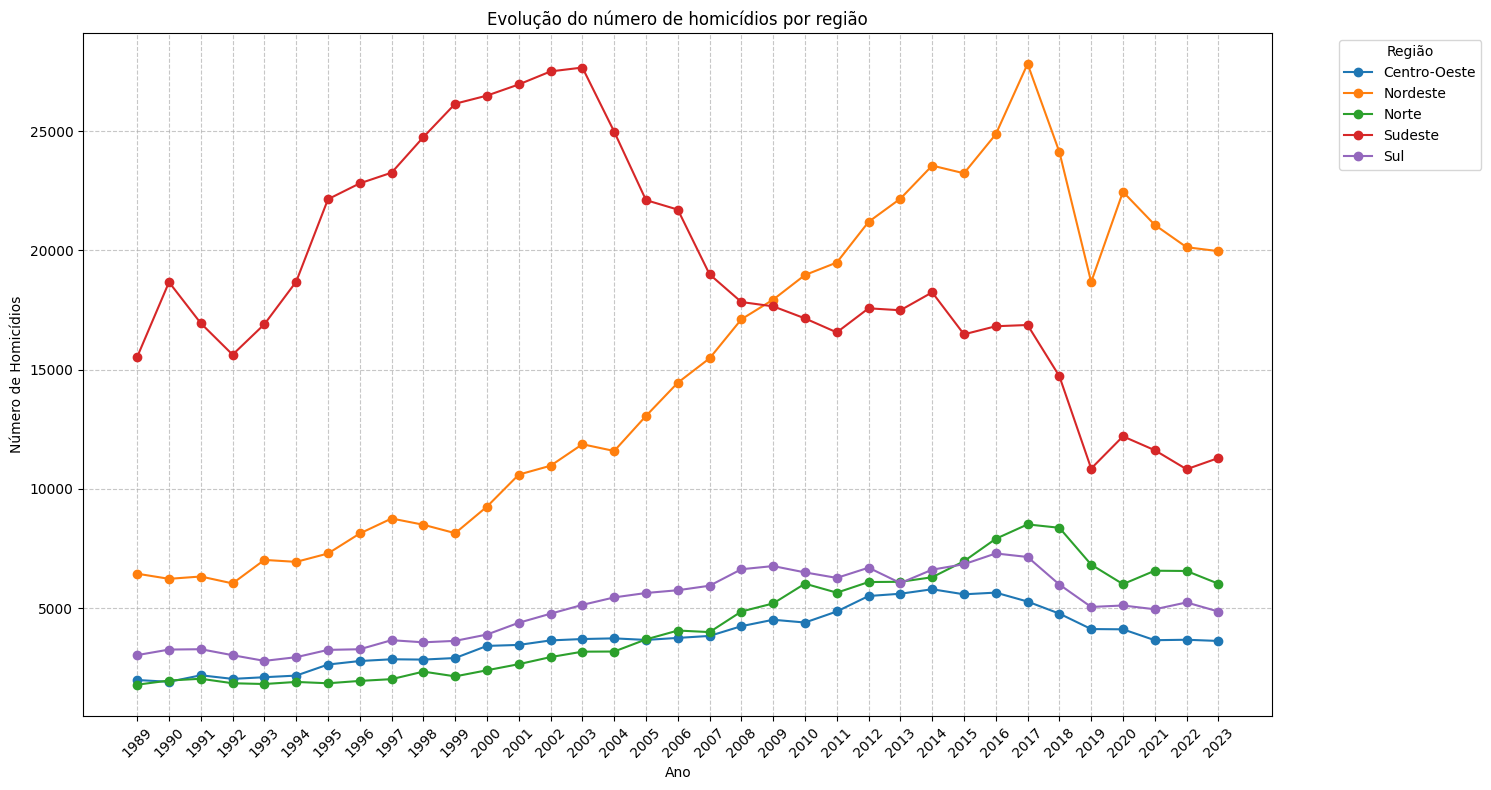

In [39]:
# Gráfico: Variação de homicídios por região
# Justificativa: Uso do gráfico de linhas para mostrar as mudanças ao longo do tempo.

homicides_by_region_time = df.groupby(['período', 'regiao'])['valor'].sum().unstack()

plt.figure(figsize=(15, 8))
homicides_by_region_time.plot(kind='line', marker='o', ax=plt.gca())

plt.title('Evolução do número de homicídios por região')
plt.xlabel('Ano')
plt.ylabel('Número de Homicídios')
plt.xticks(homicides_by_region_time.index, rotation=45)
plt.legend(title='Região', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

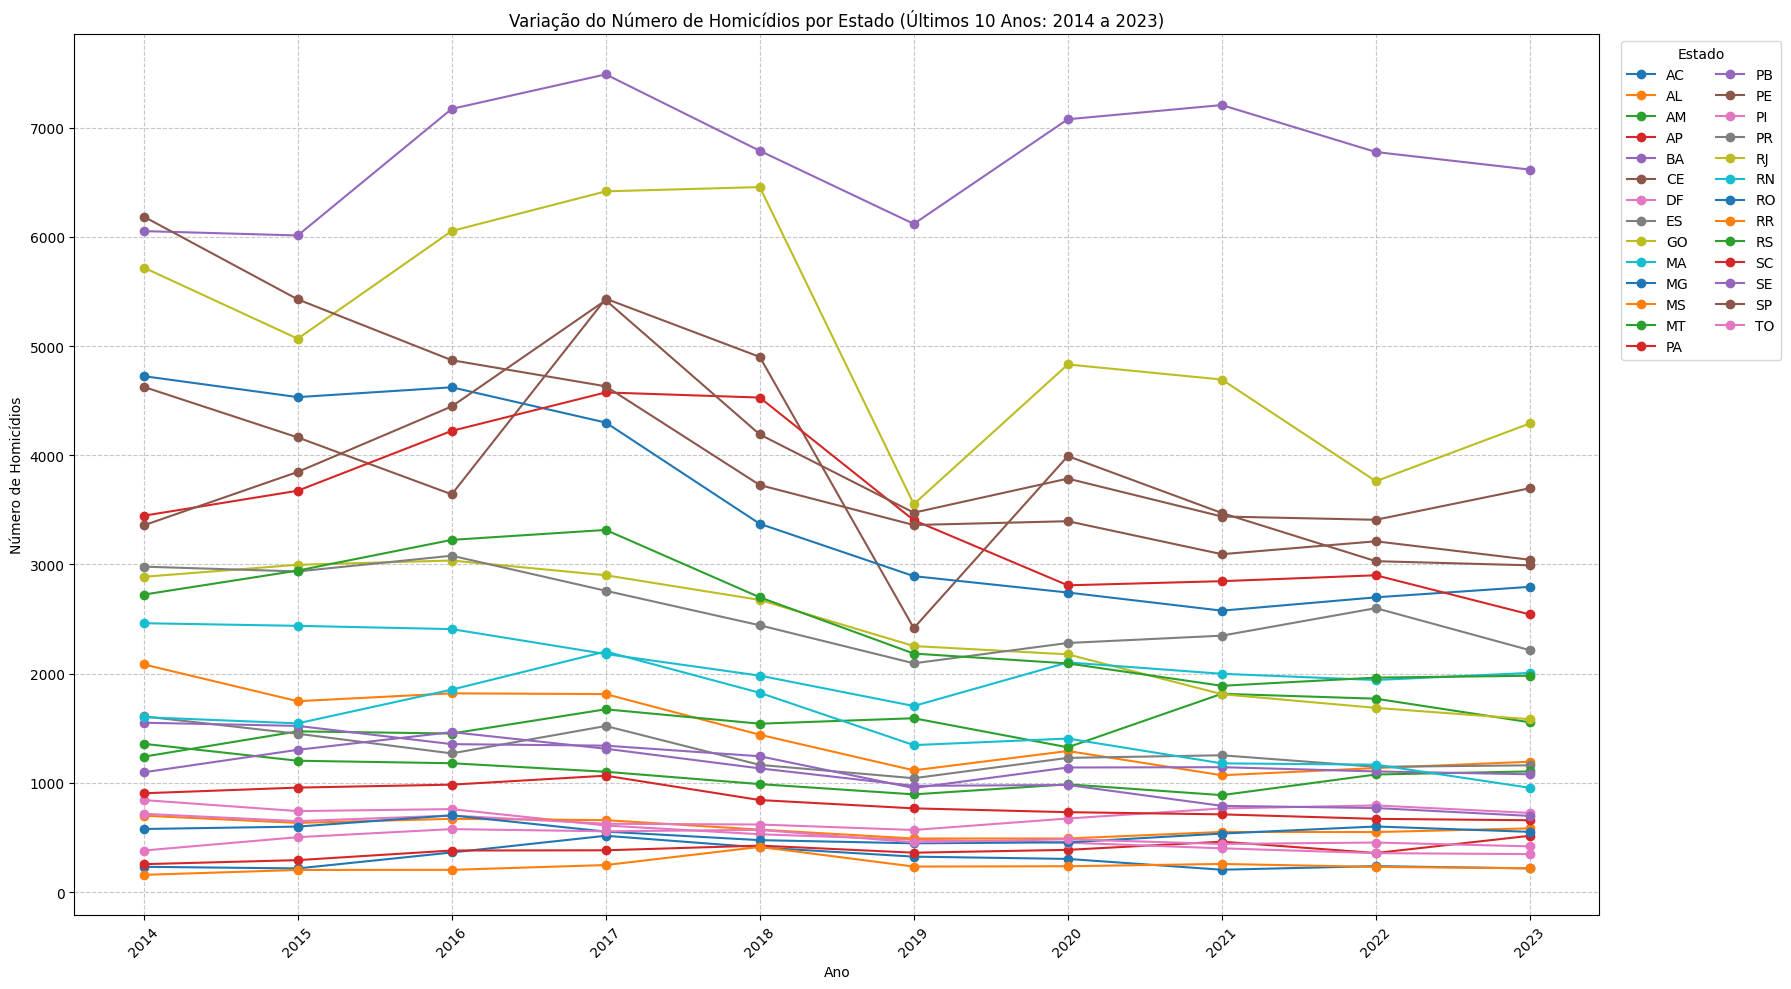

In [24]:
# Gráfico: Variação de homicídios por estado
# Justificativa: Não foi utilizado pois o número de linhas formou um emaranhado dificultando a análise.

latest_year = df['período'].max()

earliest_year_for_10_years = latest_year - 9

df_last_10_years = df[df['período'] >= earliest_year_for_10_years]

homicides_10y_pivot = df_last_10_years.pivot_table(index='período', columns='nome', values='valor', fill_value=0)

plt.figure(figsize=(18, 10)) 
homicides_10y_pivot.plot(kind='line', marker='o', ax=plt.gca())

plt.title(f'Variação do Número de Homicídios por Estado (Últimos 10 Anos: {earliest_year_for_10_years} a {latest_year})')
plt.xlabel('Ano')
plt.ylabel('Número de Homicídios')
plt.xticks(homicides_10y_pivot.index, rotation=45)
plt.legend(title='Estado', bbox_to_anchor=(1.01, 1), loc='upper left', ncol=2)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

### Roteiro para a narrativa

1. Contexto dos dados: Homicídios de 1989 a 2023   
2. Ambiente: Brasil    
4. Personagem: Vidas brasileiras      
6. Conflito: A escalada dos homicidios    
7. Clímax: Ano de 2017
8. Resolução: Queda pós 2017
9. Temática e emoção: Mensagem final